In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# Ex. 8

In [2]:
dataset_file = '../datasets/Auto.csv'
data = pd.read_csv(dataset_file, index_col='name')
data = data.loc[data.horsepower != '?']
data.horsepower = data.horsepower.apply(int)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [3]:
import statsmodels.api as sm

In [4]:
model = sm.OLS(data.mpg, sm.add_constant(data.horsepower)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           7.03e-81
Time:                        09:44:09   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
model.get_prediction([1, 98]).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


Small p-value shows that there is definetely a relationship between `mpg` and `horsepower` variables. R squared shows that 60.6 % of variability in `mpg` is explained by `horsepower`, and negative coeficient for `horsepower` shows that relationship is negative.

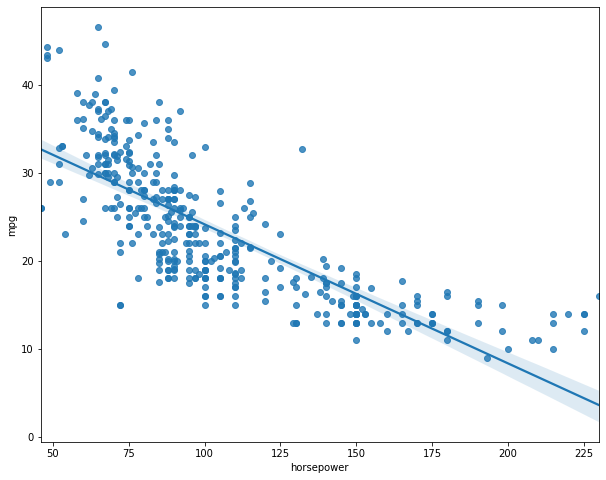

In [6]:
plt.figure(figsize=(10, 8))
sns.regplot(data.horsepower, data.mpg)

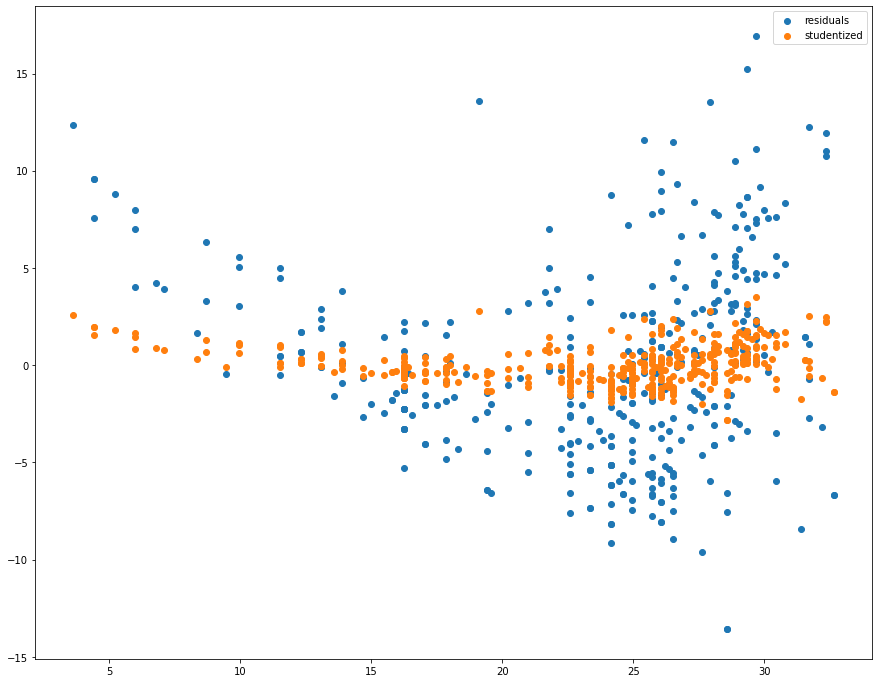

In [7]:
plt.figure(figsize=(15, 12))
predictions = model.predict(sm.add_constant(data.horsepower))
residuals = data.mpg - predictions
plt.scatter(predictions, residuals, label='residuals')
studentized = model.get_influence().resid_studentized_external
plt.scatter(predictions, studentized, label='studentized')
plt.legend()

In [9]:
log_term = np.log(data.horsepower)
log_term.name = 'horsepower_2'
log_X = pd.concat([data.horsepower, log_term], axis=1)
log_model = sm.OLS(data.mpg, sm.add_constant(log_X)).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     416.6
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           1.98e-97
Time:                        09:49:02   Log-Likelihood:                -1136.8
No. Observations:                 392   AIC:                             2280.
Df Residuals:                     389   BIC:                             2292.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          156.0406     12.083     12.914      0.000     132.285     179.796
horsepower       0.1185      0.029      4.044      0.000       0.061       0.176
horsepower_2   -31.5982      3.284     -9.623      0.000     -38.054     -25.142
==============================================================================
Omnibus:                       17.484   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.245
Skew:                           0.162   Prob(JB):                     3.01e-09
Kurtosis:                       4.516   Cond. No.                     6.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
squared_term = data.horsepower ** 2
squared_term.name = 'horsepower^2'
squared_X = pd.concat([data.horsepower, squared_term], axis=1)
squared_model = sm.OLS(data.mpg, sm.add_constant(squared_X)).fit()
squared_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           5.40e-99
Time:                        09:49:43   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           56.9001      1.800     31.604      0.000      53.360      60.440
horsepower      -0.4662      0.031    -14.978      0.000      -0.527      -0.405
horsepower^2     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Ex. 9

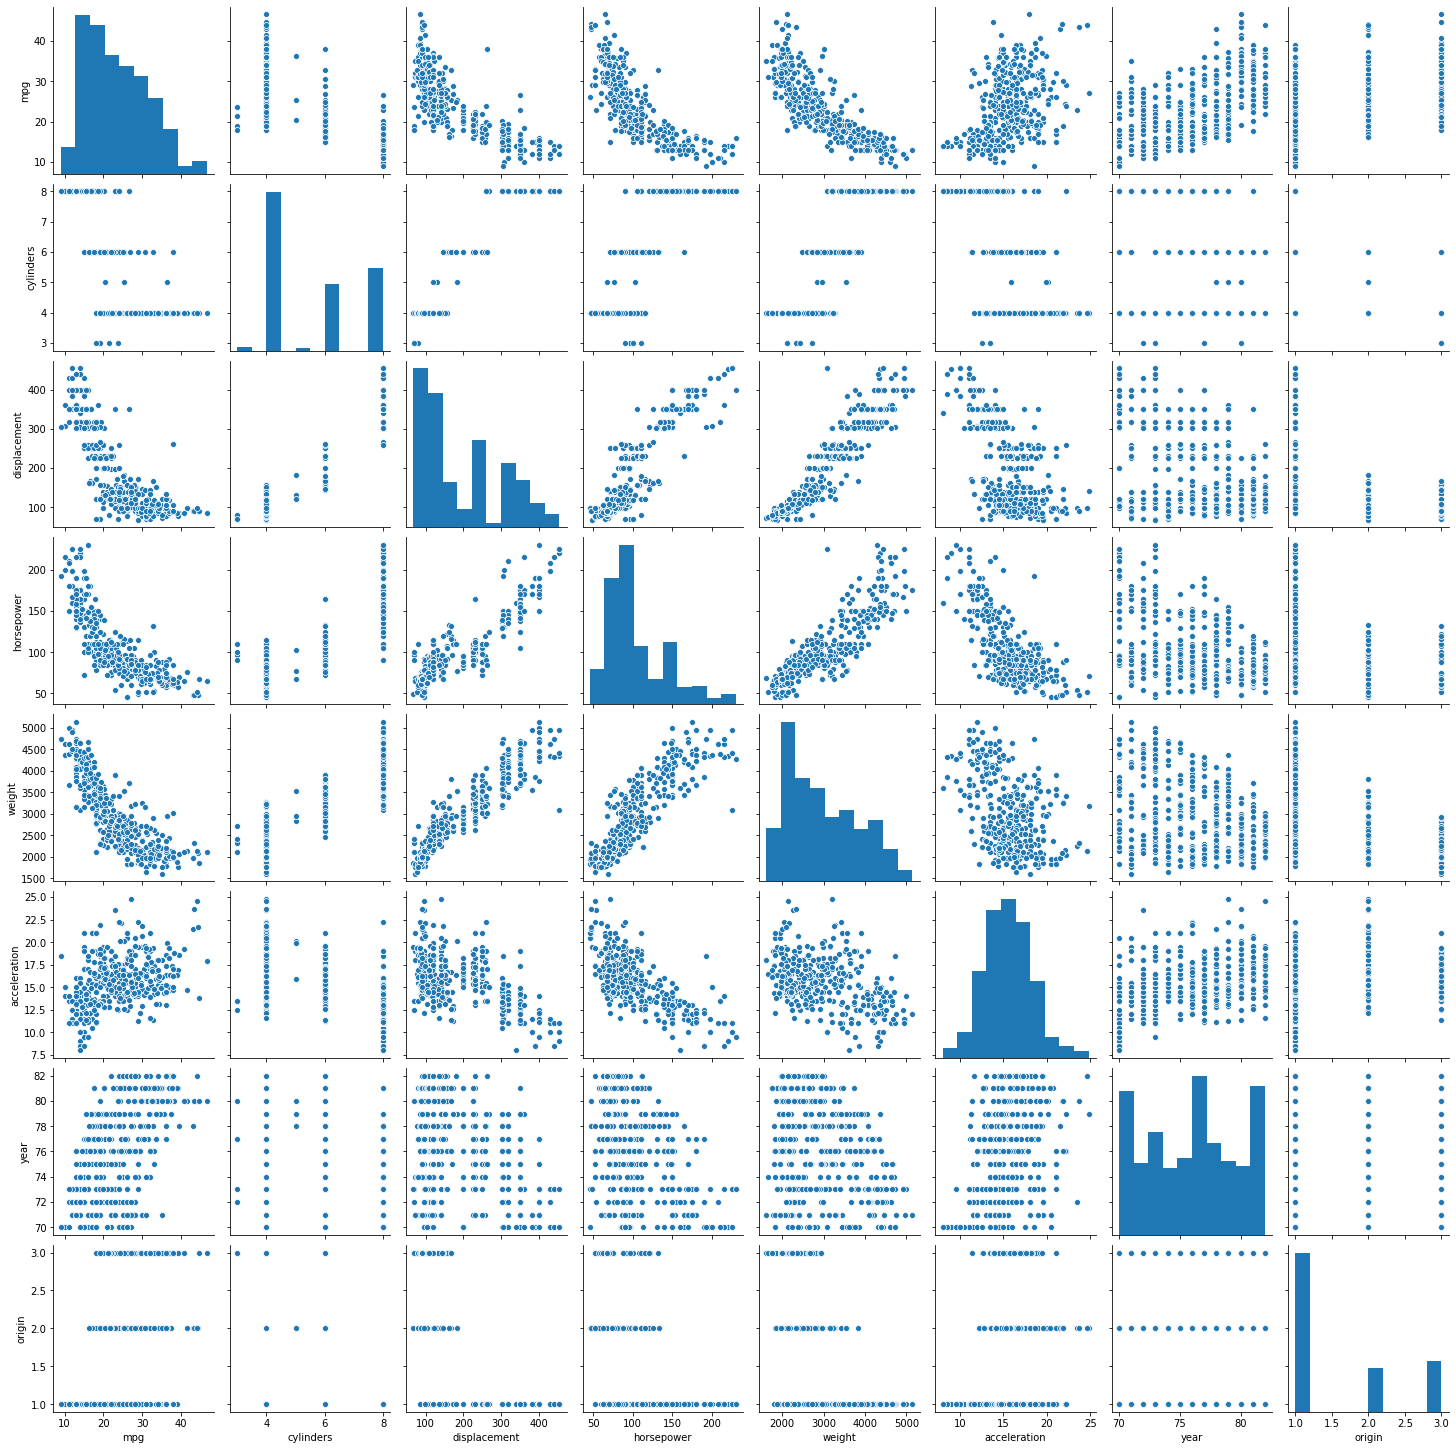

In [13]:
sns.pairplot(data=data)

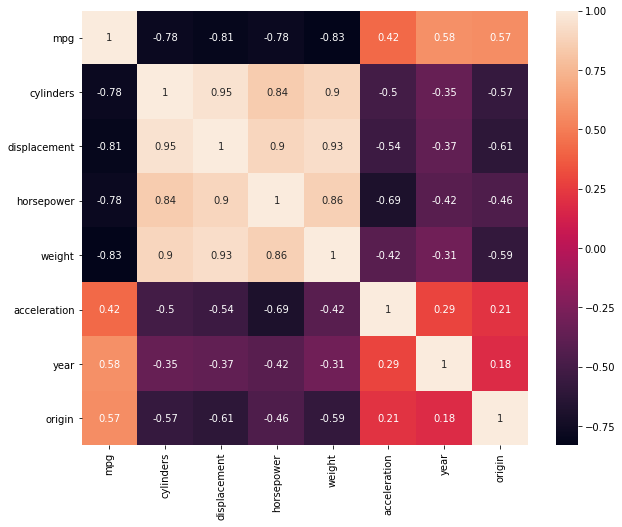

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)

In [15]:
cyl_dummies = pd.get_dummies(data.cylinders).drop([8], axis=1)
cyl_dummies.columns = ['cyl_3', 'cyl_4', 'cyl_5', 'cyl_6']
origin_dummies = pd.get_dummies(data.origin).drop([3], axis=1)
origin_dummies.columns = ['origin_1', 'origin_2']
data_with_dummies = pd.concat([data.drop(['mpg', 'cylinders', 'origin'], axis=1), cyl_dummies, origin_dummies], axis=1)
data_with_dummies.head()

,displacement,horsepower,weight,acceleration,year,cyl_3,cyl_4,cyl_5,cyl_6,origin_1,origin_2
name,,,,,,,,,,,
chevrolet chevelle malibu,307.0,130,3504,12.0,70,0,0,0,0,1,0
buick skylark 320,350.0,165,3693,11.5,70,0,0,0,0,1,0
plymouth satellite,318.0,150,3436,11.0,70,0,0,0,0,1,0
amc rebel sst,304.0,150,3433,12.0,70,0,0,0,0,1,0
ford torino,302.0,140,3449,10.5,70,0,0,0,0,1,0


In [16]:
multi_model = sm.OLS(data.mpg, sm.add_constant(data.drop(['mpg'], axis=1))).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          2.04e-139
Time:                        09:50:16   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
multi_model_2 = sm.OLS(data.mpg, sm.add_constant(data_with_dummies)).fit()
multi_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     191.1
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          2.39e-147
Time:                        09:50:16   Log-Likelihood:                -993.35
No. Observations:                 392   AIC:                             2011.
Df Residuals:                     380   BIC:                             2058.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.3637      4.631     -3.102      0.002     -23.469      -5.258
displacement     0.0187      0.007      2.590      0.010       0.005       0.033
horsepower      -0.0349      0.013     -2.639      0.009      -0.061      -0.009
weight          -0.0058      0.001     -9.154      0.000      -0.007      -0.005
acceleration     0.0260      0.093      0.279      0.780      -0.157       0.209
year             0.7370      0.049     15.064      0.000       0.641       0.833
cyl_3           -5.0992      2.109     -2.418      0.016      -9.246      -0.953
cyl_4            1.6226      1.228      1.322      0.187      -0.792       4.037
cyl_5            1.9792      2.105      0.940      0.348      -2.160       6.118
cyl_6           -1.7480      0.797     -2.193      0.029      -3.315      -0.181
origin_1        -2.6172      0.527     -4.964      0.000      -3.654      -1.581
origin_2        -0.8532      0.546     -1.564      0.119      -1.926       0.220
==============================================================================
Omnibus:                       45.781   Durbin-Watson:                   1.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.634
Skew:                           0.677   Prob(JB):                     2.54e-19
Kurtosis:                       4.846   Cond. No.                     9.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Model 2')

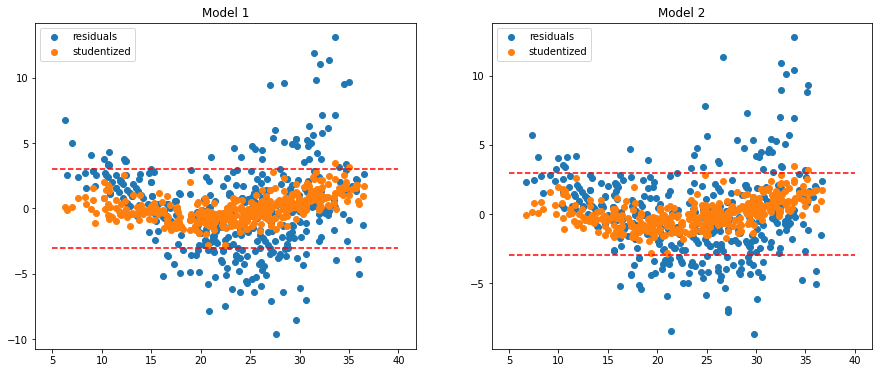

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
line = np.linspace(5, 40, 50)

predictions = multi_model.predict(sm.add_constant(data.drop(['mpg'], axis=1)))
residuals = data.mpg - predictions
axes[0].scatter(predictions, residuals, label='residuals')
studentized = model.get_influence().resid_studentized_external
axes[0].scatter(predictions, studentized, label='studentized')
axes[0].legend()
axes[0].plot(line, np.full(line.shape, 3), 'r--')
axes[0].plot(line, np.full(line.shape, -3), 'r--')
axes[0].set_title('Model 1')

predictions = multi_model_2.predict(sm.add_constant(data_with_dummies))
residuals = data.mpg - predictions
axes[1].scatter(predictions, residuals, label='residuals')
studentized = model.get_influence().resid_studentized_external
axes[1].scatter(predictions, studentized, label='studentized')
axes[1].legend()
axes[1].plot(line, np.full(line.shape, 3), 'r--')
axes[1].plot(line, np.full(line.shape, -3), 'r--')
axes[1].set_title('Model 2')

F-statistic is far from 1, which means that there is a relationship between predictors and response. P-values show that `displacement`, `weight`, `year` and `origin` have relationship to `mpg`, but `cylinders`, `horsepower` and `acceleration` do not. `year` coeffitient shows for how much `mpg` increases with each year.

13

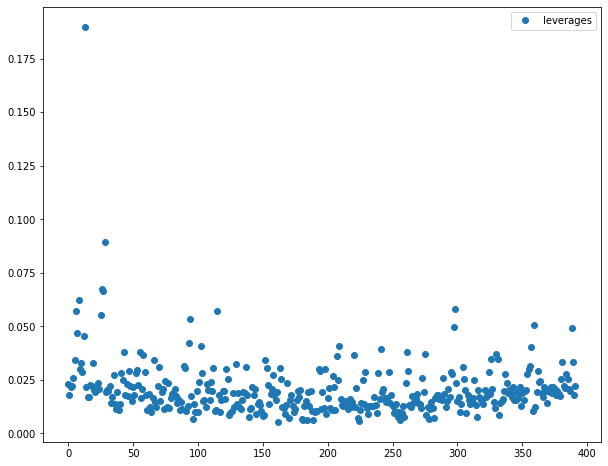

In [19]:
plt.figure(figsize=(10, 8))
hat_values = multi_model.get_influence().hat_matrix_diag
plt.plot(hat_values, 'o', label='leverages')
plt.legend()
hat_values.argmax()

In [20]:
print(residuals[13])
residuals.describe()

-3.6859154442224167


count    3.920000e+02
mean     1.053126e-13
std      3.053786e+00
min     -8.679687e+00
25%     -1.937324e+00
50%     -6.777841e-02
75%      1.671145e+00
max      1.277558e+01
dtype: float64

Residual plot shows some pattern in residuals, which tells us that data is non-linear. Also there is some outliers (studentized values > 3) at residual plot. Leverages plot show one significant point with high leverage

In [26]:
data_with_dummies.columns

Index(['displacement', 'horsepower', 'weight', 'acceleration', 'year', 'cyl_3',
       'cyl_4', 'cyl_5', 'cyl_6', 'origin_1', 'origin_2'],
      dtype='object')

In [37]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [57]:
inter_terms = {}
cols = data_with_dummies.columns
for i in range(len(cols) - 1):
    for j in range(i + 1, len(cols)):
        inter_terms[f'{cols[i]}x{cols[j]}'] = data_with_dummies[cols[i]] * data_with_dummies[cols[j]]
to_delete = [key for key in inter_terms.keys() if key.split('x')[0][:3] == key.split('x')[1][:3]]
for key in to_delete:
    del inter_terms[key]
inter_terms.keys()

dict_keys(['displacementxhorsepower', 'displacementxweight', 'displacementxacceleration', 'displacementxyear', 'displacementxcyl_3', 'displacementxcyl_4', 'displacementxcyl_5', 'displacementxcyl_6', 'displacementxorigin_1', 'displacementxorigin_2', 'horsepowerxweight', 'horsepowerxacceleration', 'horsepowerxyear', 'horsepowerxcyl_3', 'horsepowerxcyl_4', 'horsepowerxcyl_5', 'horsepowerxcyl_6', 'horsepowerxorigin_1', 'horsepowerxorigin_2', 'weightxacceleration', 'weightxyear', 'weightxcyl_3', 'weightxcyl_4', 'weightxcyl_5', 'weightxcyl_6', 'weightxorigin_1', 'weightxorigin_2', 'accelerationxyear', 'accelerationxcyl_3', 'accelerationxcyl_4', 'accelerationxcyl_5', 'accelerationxcyl_6', 'accelerationxorigin_1', 'accelerationxorigin_2', 'yearxcyl_3', 'yearxcyl_4', 'yearxcyl_5', 'yearxcyl_6', 'yearxorigin_1', 'yearxorigin_2', 'cyl_3xorigin_1', 'cyl_3xorigin_2', 'cyl_4xorigin_1', 'cyl_4xorigin_2', 'cyl_5xorigin_1', 'cyl_5xorigin_2', 'cyl_6xorigin_1', 'cyl_6xorigin_2'])

In [105]:
interterm_data_with_free_terms = {}
cols = data.drop(['mpg'], axis=1).columns.tolist()
cols.insert(-1, cols.pop(0))
print(cols)
for i in range(len(cols) - 1):
    for j in range(i + 1, len(cols)):
        left_cols = list(set([key.split('x')[0] for key in inter_terms.keys() if key.split('x')[0].startswith(cols[i][:3])]))
        right_cols = list(set([key.split('x')[1] for key in inter_terms.keys() if key.split('x')[1].startswith(cols[j][:3])]))
        pairs = sorted([f'{left}x{right}' for left in left_cols for right in right_cols])
        print(pairs)
        temp = pd.concat([inter_terms[key] for key in pairs], axis=1)
        temp.columns = pairs
        temp = pd.concat([data_with_dummies.loc[:, left_cols + right_cols], temp], axis=1)
        interterm_data_with_free_terms[f'{cols[i]}x{cols[j]}'] = temp

interterm_data_with_free_terms.keys()

['displacement', 'horsepower', 'weight', 'acceleration', 'year', 'cylinders', 'origin']
['displacementxhorsepower']
['displacementxweight']
['displacementxacceleration']
['displacementxyear']
['displacementxcyl_3', 'displacementxcyl_4', 'displacementxcyl_5', 'displacementxcyl_6']
['displacementxorigin_1', 'displacementxorigin_2']
['horsepowerxweight']
['horsepowerxacceleration']
['horsepowerxyear']
['horsepowerxcyl_3', 'horsepowerxcyl_4', 'horsepowerxcyl_5', 'horsepowerxcyl_6']
['horsepowerxorigin_1', 'horsepowerxorigin_2']
['weightxacceleration']
['weightxyear']
['weightxcyl_3', 'weightxcyl_4', 'weightxcyl_5', 'weightxcyl_6']
['weightxorigin_1', 'weightxorigin_2']
['accelerationxyear']
['accelerationxcyl_3', 'accelerationxcyl_4', 'accelerationxcyl_5', 'accelerationxcyl_6']
['accelerationxorigin_1', 'accelerationxorigin_2']
['yearxcyl_3', 'yearxcyl_4', 'yearxcyl_5', 'yearxcyl_6']
['yearxorigin_1', 'yearxorigin_2']
['cyl_3xorigin_1', 'cyl_3xorigin_2', 'cyl_4xorigin_1', 'cyl_4xorigin_2',

dict_keys(['displacementxhorsepower', 'displacementxweight', 'displacementxacceleration', 'displacementxyear', 'displacementxcylinders', 'displacementxorigin', 'horsepowerxweight', 'horsepowerxacceleration', 'horsepowerxyear', 'horsepowerxcylinders', 'horsepowerxorigin', 'weightxacceleration', 'weightxyear', 'weightxcylinders', 'weightxorigin', 'accelerationxyear', 'accelerationxcylinders', 'accelerationxorigin', 'yearxcylinders', 'yearxorigin', 'cylindersxorigin'])

In [73]:
interterm_data_with_free_terms['accelerationxorigin'].head()

,acceleration,origin_2,origin_1,accelerationxorigin_1,accelerationxorigin_2
name,,,,,
chevrolet chevelle malibu,12.0,0,1,12.0,0.0
buick skylark 320,11.5,0,1,11.5,0.0
plymouth satellite,11.0,0,1,11.0,0.0
amc rebel sst,12.0,0,1,12.0,0.0
ford torino,10.5,0,1,10.5,0.0


In [83]:
for key in interterm_data_with_free_terms.keys():
    model = sm.OLS(data.mpg, sm.add_constant(interterm_data_without_free_terms[key])).fit()
    print(key)
    print(model.rsquared)
    print(model.fvalue)
    print(model.f_pvalue)
    print()

displacementxhorsepower
0.7465843639484142
381.02717696685187
3.004637181863526e-115

displacementxweight
0.7265268201240589
343.59543208345934
7.757075520538667e-109

displacementxacceleration
0.6765604699715367
270.53533244772245
1.0297683549089045e-94

displacementxyear
0.7735262918753038
441.74105055109743
1.035639560158252e-124

displacementxcylinders
0.7184355244337233
108.30058245953921
2.0211140430002146e-99

displacementxorigin
0.6740232352721356
159.62669549913767
1.2547645134778726e-91

horsepowerxweight
0.7484351450253209
384.7819366488398
7.256690373224504e-116

horsepowerxacceleration
0.680871043970277
275.9364828010807
7.650546199652459e-96

horsepowerxyear
0.7521682867976963
392.52616423532226
4.000851844384961e-117

horsepowerxcylinders
0.7514657154438218
128.334587189923
1.0540065243982869e-109

horsepowerxorigin
0.6831311364757822
166.4339094393215
5.394776751645586e-94

weightxacceleration
0.705961712864374
310.5186825154666
9.826551884304642e-103

weightxyear
0.833

`weight` and `year` interaction have the best R-squared value. It appears that all interactions have predictive power. 

In [93]:
data_with_log_terms = {}
data_with_root_terms = {}
data_with_squared_terms = {}
cols = data.drop(['mpg', 'cylinders', 'origin'], axis=1)

for col in cols:
    data_with_log_terms[col] = pd.concat([data[col], np.log(data[col])], axis=1)
    data_with_root_terms[col] = pd.concat([data[col], np.sqrt(data[col])], axis=1)
    data_with_squared_terms[col] = pd.concat([data[col], data[col] ** 2], axis=1)

In [104]:
for key in data_with_log_terms.keys():
    model = sm.OLS(data.mpg, sm.add_constant(data_with_log_terms[key])).fit()
    print(key)
    print(model.rsquared)
    print(model.pvalues)
    print()

displacement
0.6873139696820081
const           6.792298e-25
displacement    2.704292e-01
displacement    1.338006e-11
dtype: float64

horsepower
0.6817155385106664
const         5.330637e-32
horsepower    6.338418e-05
horsepower    8.368921e-20
dtype: float64

weight
0.7140020031669523
const     1.992006e-10
weight    1.779718e-01
weight    1.214480e-07
dtype: float64

acceleration
0.19371999969097742
const           0.015132
acceleration    0.181683
acceleration    0.008472
dtype: float64

year
0.36782160831346633
const    0.000023
year     0.000004
year     0.000017
dtype: float64



In [95]:
for key in data_with_root_terms.keys():
    model = sm.OLS(data.mpg, sm.add_constant(data_with_root_terms[key])).fit()
    print(key)
    print(model.rsquared)
    print(model.pvalues)
    print()

displacement
0.6887943896457622
const           1.969300e-43
displacement    3.116516e-05
displacement    5.222059e-12
dtype: float64

horsepower
0.6850316751171257
const         5.526026e-44
horsepower    4.487041e-12
horsepower    1.068818e-20
dtype: float64

weight
0.7144766368935089
const     3.583719e-19
weight    6.306404e-04
weight    8.702008e-08
dtype: float64

acceleration
0.1941043651581107
const           0.012526
acceleration    0.042029
acceleration    0.007640
dtype: float64

year
0.3677551507077431
const    0.000029
year     0.000009
year     0.000018
dtype: float64



In [96]:
for key in data_with_squared_terms.keys():
    model = sm.OLS(data.mpg, sm.add_constant(data_with_squared_terms[key])).fit()
    print(key)
    print(model.rsquared)
    print(model.pvalues)
    print()

displacement
0.688808733323848
const           1.589533e-136
displacement     6.129518e-30
displacement     5.174575e-12
dtype: float64

horsepower
0.6875590305127515
const         1.740911e-109
horsepower     2.289429e-40
horsepower     2.196340e-21
dtype: float64

weight
0.7151475557845139
const     3.848779e-65
weight    5.609944e-19
weight    5.429177e-08
dtype: float64

acceleration
0.19396401103217598
const           0.051095
acceleration    0.000131
acceleration    0.007934
dtype: float64

year
0.36752584086301265
const    0.000138
year     0.000072
year     0.000019
dtype: float64



Models with non-linear `weight` predictor have highest R-squared values, although they don't give big improvement of original.

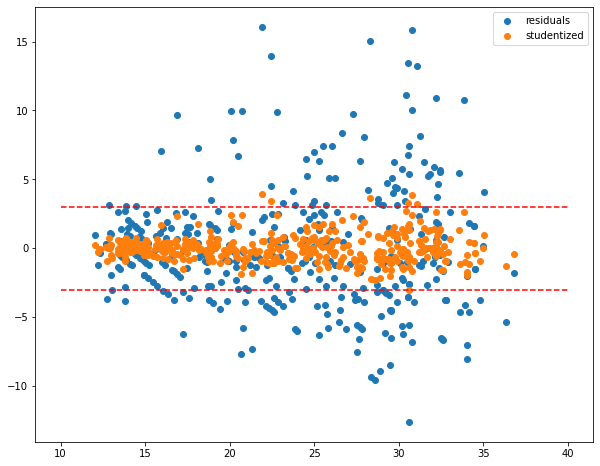

In [102]:
plt.figure(figsize=(10, 8))
line = np.linspace(10, 40, 50)

model = sm.OLS(data.mpg, sm.add_constant(data_with_squared_terms['weight'])).fit()
predictions = model.predict(sm.add_constant(data_with_squared_terms['weight']))
residuals = data.mpg - predictions
plt.scatter(predictions, residuals, label='residuals')
studentized = model.get_influence().resid_studentized_external
plt.scatter(predictions, studentized, label='studentized')
plt.legend()
plt.plot(line, np.full(line.shape, 3), 'r--')
plt.plot(line, np.full(line.shape, -3), 'r--')

In [120]:
data_with_best = pd.concat([
    data_with_dummies,
    data.weight ** 2,
    data.weight * data.year
], axis=1)
data_with_best.columns = ['displacement', 'horsepower', 'weight', 'acceleration', 'year', 'cyl_3', 'cyl_4', 'cyl_5', 'cyl_6', 'origin_1', 'origin_2', 'weight^2', 'weightxyear']
data_with_best.head()

,displacement,horsepower,weight,acceleration,year,cyl_3,cyl_4,cyl_5,cyl_6,origin_1,origin_2,weight^2,weightxyear
name,,,,,,,,,,,,,
chevrolet chevelle malibu,307.0,130,3504,12.0,70,0,0,0,0,1,0,12278016,245280
buick skylark 320,350.0,165,3693,11.5,70,0,0,0,0,1,0,13638249,258510
plymouth satellite,318.0,150,3436,11.0,70,0,0,0,0,1,0,11806096,240520
amc rebel sst,304.0,150,3433,12.0,70,0,0,0,0,1,0,11785489,240310
ford torino,302.0,140,3449,10.5,70,0,0,0,0,1,0,11895601,241430


In [121]:
best_model = sm.OLS(data.mpg, sm.add_constant(data_with_best)).fit()
print(best_model.rsquared)
print(best_model.pvalues)
print()

0.8750902507116047
const           1.555106e-06
displacement    5.088978e-02
horsepower      2.794595e-03
weight          1.171058e-01
acceleration    4.446400e-01
year            1.868565e-19
cyl_3           1.180248e-02
cyl_4           5.737839e-01
cyl_5           1.669502e-01
cyl_6           3.392792e-01
origin_1        9.932181e-04
origin_2        9.720360e-01
weight^2        2.661017e-07
weightxyear     4.737128e-07
dtype: float64



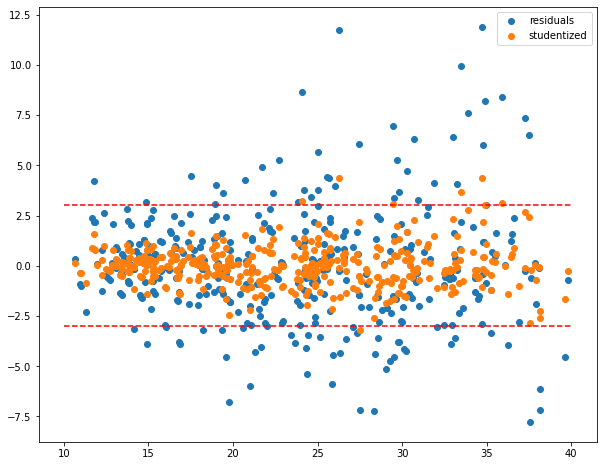

In [122]:
plt.figure(figsize=(10, 8))
line = np.linspace(10, 40, 50)

model = sm.OLS(data.mpg, sm.add_constant(data_with_best)).fit()
predictions = model.predict(sm.add_constant(data_with_best))
residuals = data.mpg - predictions
plt.scatter(predictions, residuals, label='residuals')
studentized = model.get_influence().resid_studentized_external
plt.scatter(predictions, studentized, label='studentized')
plt.legend()
plt.plot(line, np.full(line.shape, 3), 'r--')
plt.plot(line, np.full(line.shape, -3), 'r--')

# Ex. 10

In [123]:
dataset_file = '../datasets/Carseats.csv'
data = pd.read_csv(dataset_file)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [145]:
data.loc[data.isna().any(axis=1)]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [160]:
shelveloc_dummies = pd.get_dummies(data.ShelveLoc).drop(['Medium'], axis=1)
urban_dummies = pd.get_dummies(data.Urban).drop(['No'], axis=1)
us_dummies = pd.get_dummies(data.US).drop(['No'], axis=1)
shelveloc_dummies.columns = ['ShelveLocBad', 'ShelveLocGood']
urban_dummies.columns = ['Urban']
us_dummies.columns = ['US']

data_y = data.Sales
data_X = pd.concat([
    data.drop(['Sales', 'ShelveLoc', 'Urban', 'US'], axis=1),
    shelveloc_dummies,
    urban_dummies,
    us_dummies
], axis=1)
data_X.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLocBad,ShelveLocGood,Urban,US
0,138,73,11,276,120,42,17,1,0,1,1
1,111,48,16,260,83,65,10,0,1,1,1
2,113,35,10,269,80,59,12,0,0,1,1
3,117,100,4,466,97,55,14,0,0,1,1
4,141,64,3,340,128,38,13,1,0,1,0


In [163]:
sales_on_price_urban_us = sm.OLS(data_y, sm.add_constant(data_X.loc[:, ['Price', 'Urban', 'US']])).fit()
sales_on_price_urban_us.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           2.39e-23
Time:                        15:19:23   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model coeficients show that `Sales` have an intercept of 13.0435. Variable `Price` is in negative relationship with `Sales`, with each 1-unit increase in `Price`, `Sales` go down with approximately 0.05 units. `Urban` also has negative relationship. Considering that `Urban` is qualitative variable, if `Urban` set to true, `Sales` go down with approximately 0.02 units. But t-test for `Urban` variable results in a big p-value, which points on insignificance. `US` variable has positive relation to `Sales`. If `US` set to true, `Sales` increases by 1.2 units.

`Sales = 13.0435 - 0.0545 * Price - [0.0219 if Urban is True] + [1.2006 if US is True]`

In [164]:
sales_on_price_us = sm.OLS(data_y, sm.add_constant(data_X.loc[:, ['Price', 'US']])).fit()
sales_on_price_us.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           2.66e-24
Time:                        16:43:50   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US             1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Removing insignificant variable doesn't result in model performance change. It only results in F-score increase.

In [166]:
sales_on_price_us.conf_int()

,0,1
const,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766


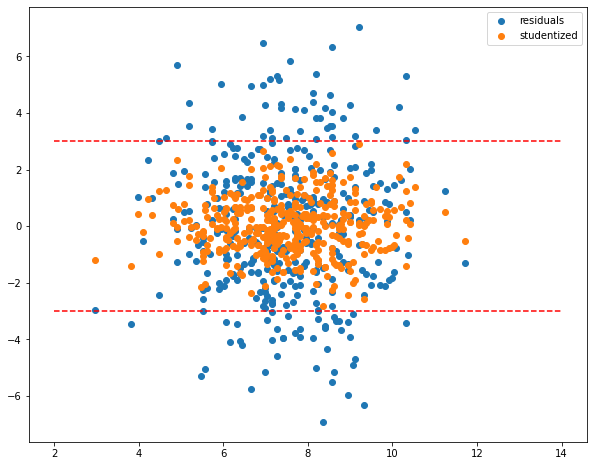

In [169]:
plt.figure(figsize=(10, 8))
line = np.linspace(2, 14, 50)

predictions = sales_on_price_us.predict(sm.add_constant(sm.add_constant(data_X.loc[:, ['Price', 'US']])))
residuals = data_y - predictions
plt.scatter(predictions, residuals, label='residuals')
studentized = sales_on_price_us.get_influence().resid_studentized_external
plt.scatter(predictions, studentized, label='studentized')
plt.legend()
plt.plot(line, np.full(line.shape, 3), 'r--')
plt.plot(line, np.full(line.shape, -3), 'r--')

42

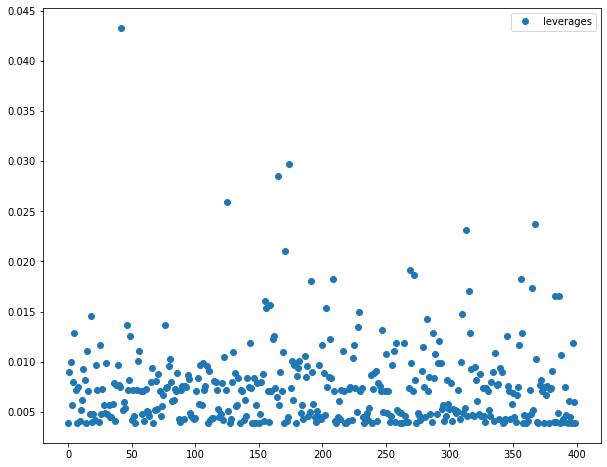

In [170]:
plt.figure(figsize=(10, 8))
hat_values = sales_on_price_us.get_influence().hat_matrix_diag
plt.plot(hat_values, 'o', label='leverages')
plt.legend()
hat_values.argmax()

In [171]:
residuals[42]

-1.2933295751008806

In [172]:
residuals.describe()

count    4.000000e+02
mean    -1.611156e-14
std      2.463200e+00
min     -6.926851e+00
25%     -1.628643e+00
50%     -5.740294e-02
75%      1.576635e+00
max      7.051506e+00
dtype: float64

Plot for residuals shows no anomalies. Point with highest leverage does not relate to significant residual.

# Ex. 11

In [175]:
np.random.seed(1)
X = np.random.normal(size=100)
y = 2 * X + np.random.normal(size=100)

In [176]:
simple_model = sm.OLS(y, X).fit()
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Mon, 31 Aug 2020   Prob (F-statistic):                    3.46e-36
Time:                        17:07:04   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coeficient is very close to real value of beta. Standard error is close to difference between true and estimated values of beta. T-value and associated p-value shows that 